# Load packages

In [1]:
# Note: perform in scanpy conda environment

import scanpy as sc
import matplotlib.pyplot as plt

# Load data and filter

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()
adata_filt = sc.pp.recipe_zheng17(adata, copy=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# PCA

... storing 'feature_types' as categorical
... storing 'genome' as categorical


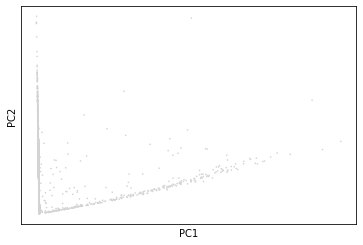

In [3]:
adata = sc.tl.pca(adata, copy=True)
sc.pl.pca(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


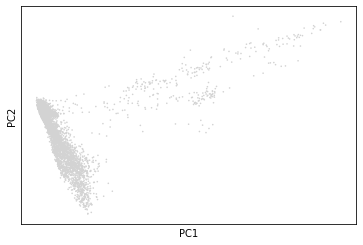

In [4]:
adata_filt = sc.tl.pca(adata_filt, copy=True)
sc.pl.pca(adata_filt)

# Step 2: Clustering

In [5]:
sc.pp.neighbors(adata_filt)
sc.tl.leiden(adata_filt)

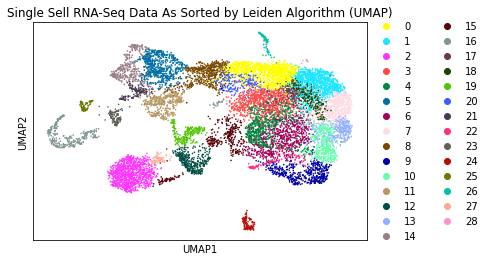

In [6]:
sc.tl.umap(adata_filt)
sc.pl.umap(adata_filt, color='leiden',
           title='Single Sell RNA-Seq Data As Sorted by Leiden Algorithm (UMAP)')

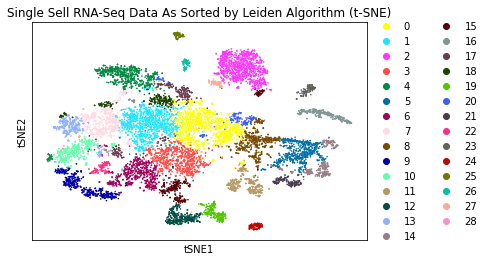

In [7]:
sc.tl.tsne(adata_filt)
sc.pl.tsne(adata_filt, color='leiden',
           title='Single Sell RNA-Seq Data As Sorted by Leiden Algorithm (t-SNE)')

# Step 3: Distinguishing genes
## Using t-test method

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


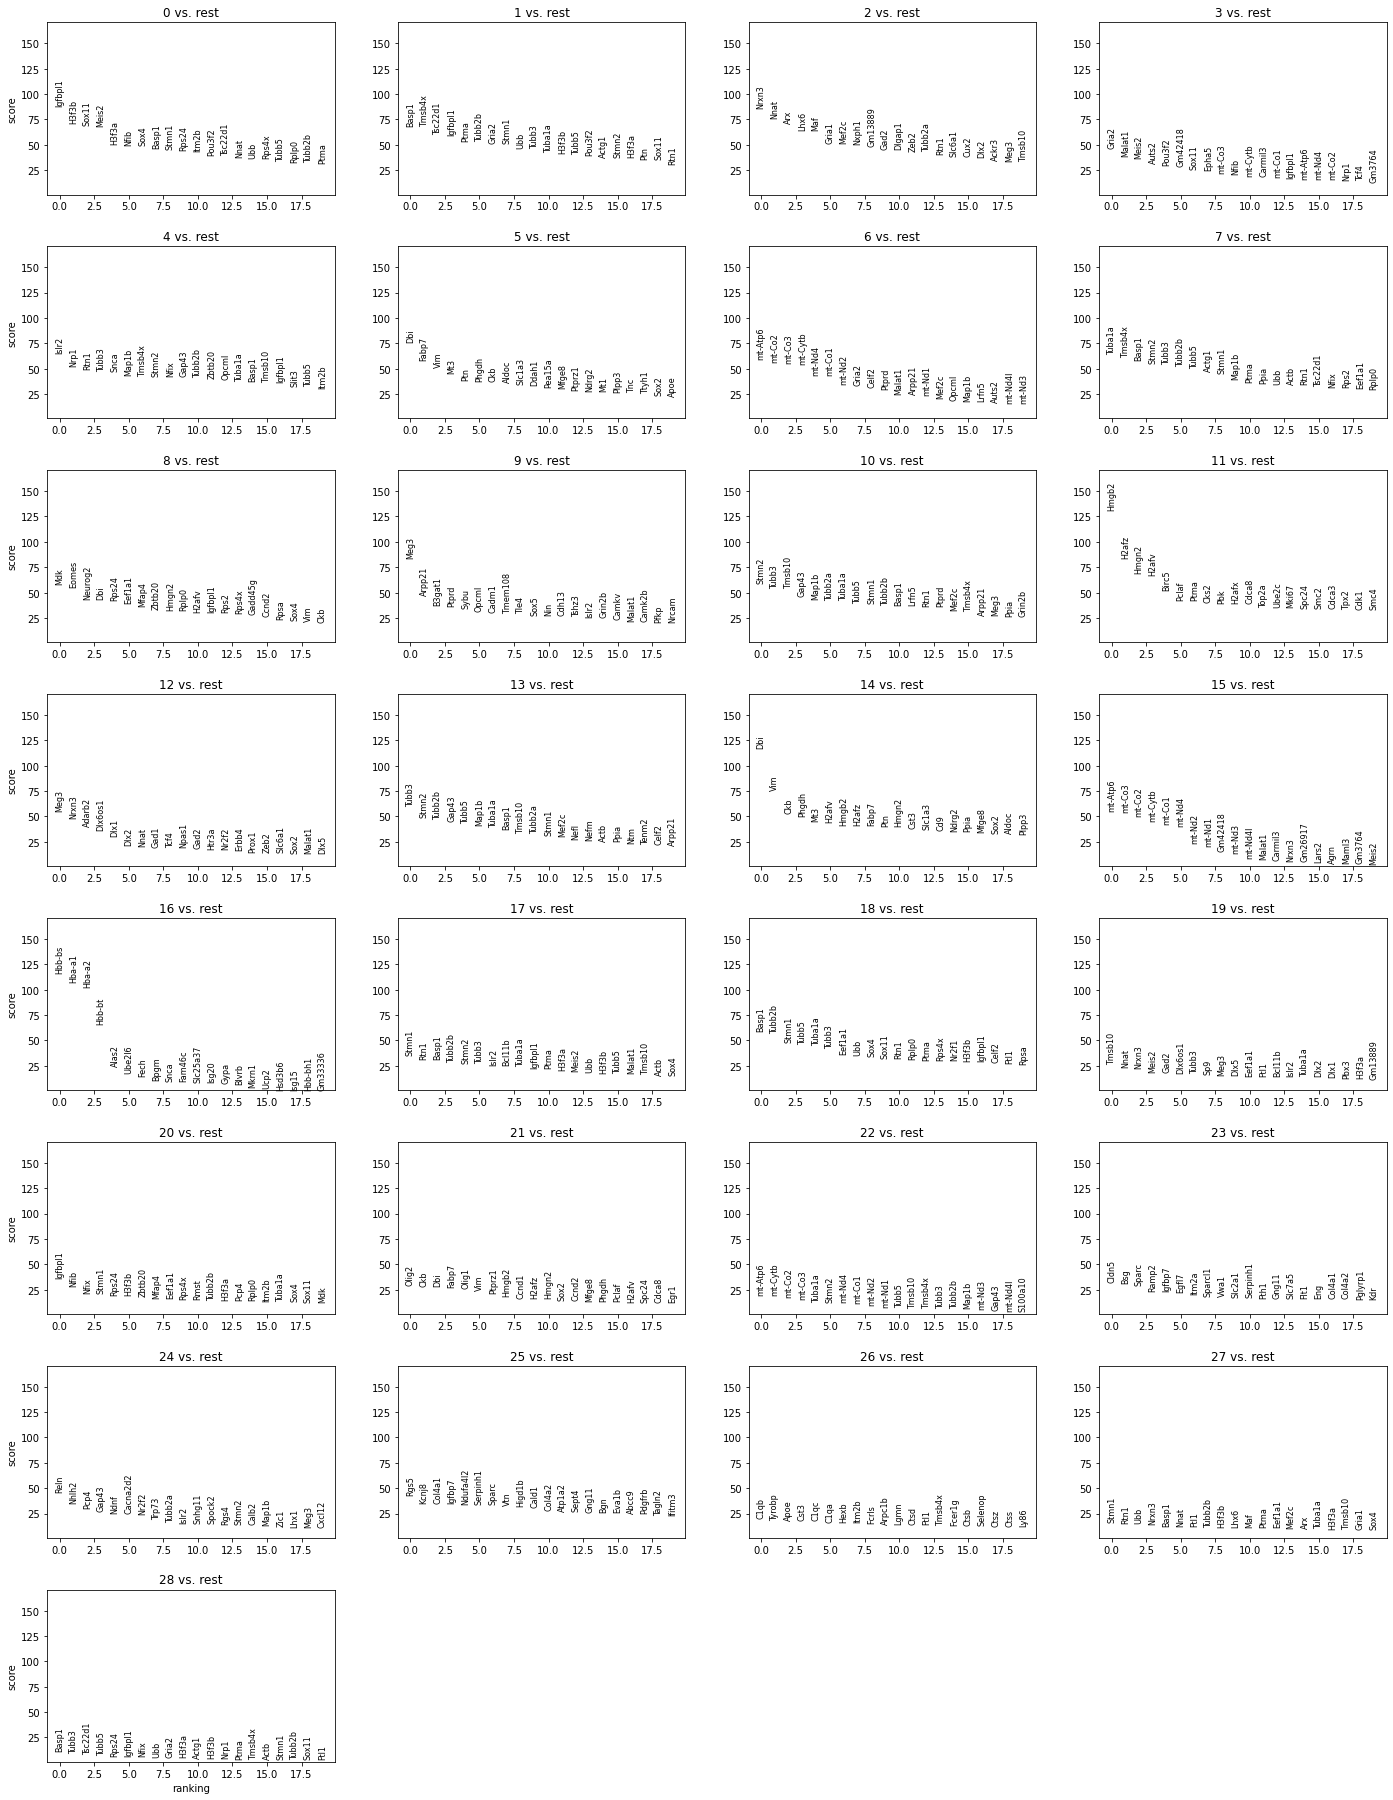

In [8]:
sc.tl.rank_genes_groups(adata_filt, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_filt)

## Using logistic regression

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


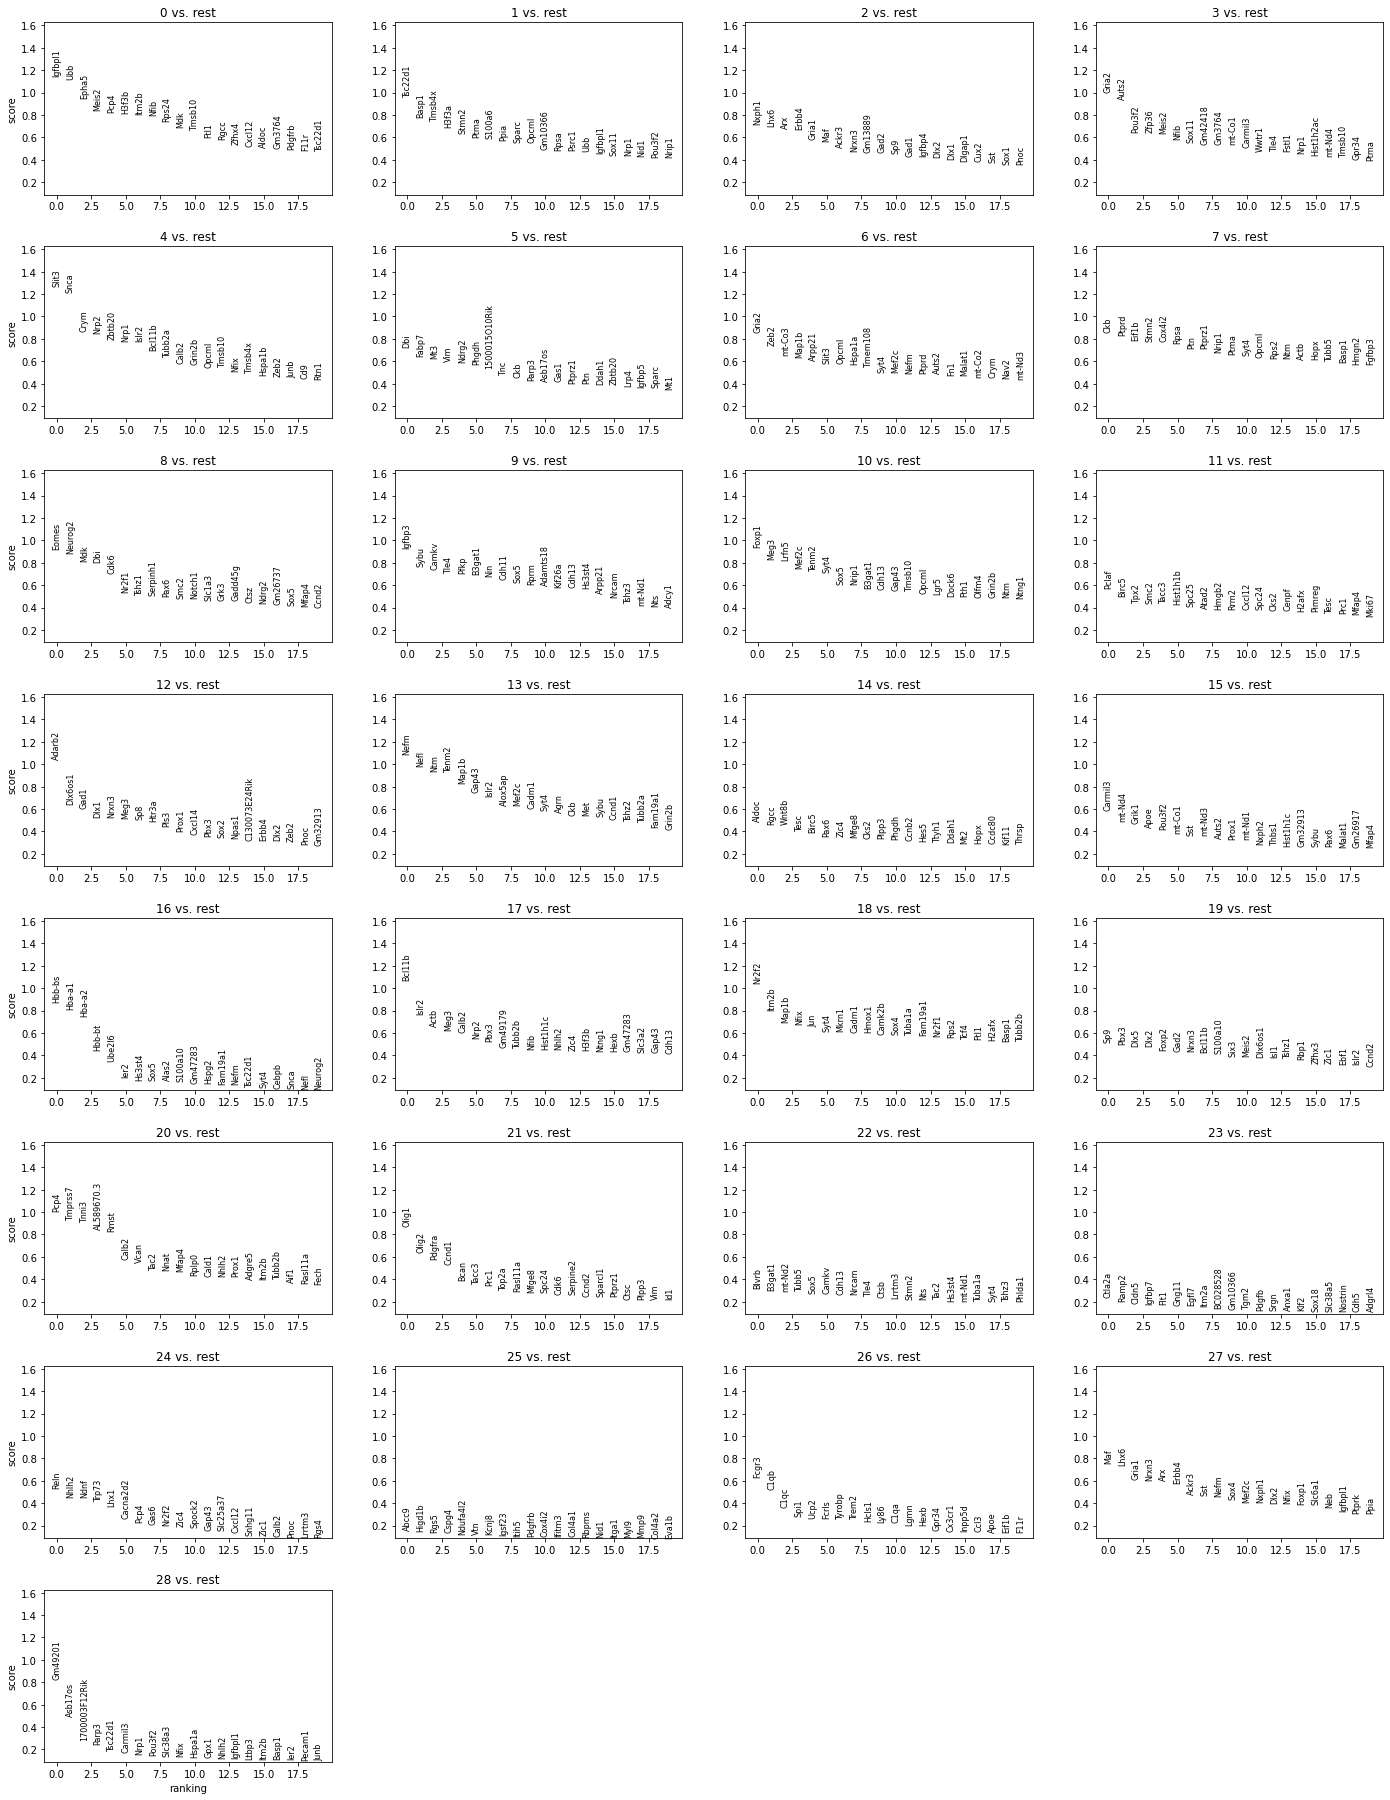

In [9]:
sc.tl.rank_genes_groups(adata_filt, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_filt)

# Step 4: Cell types
I tested known markers for different cell populations and have saved them in the `markers` dictionary.

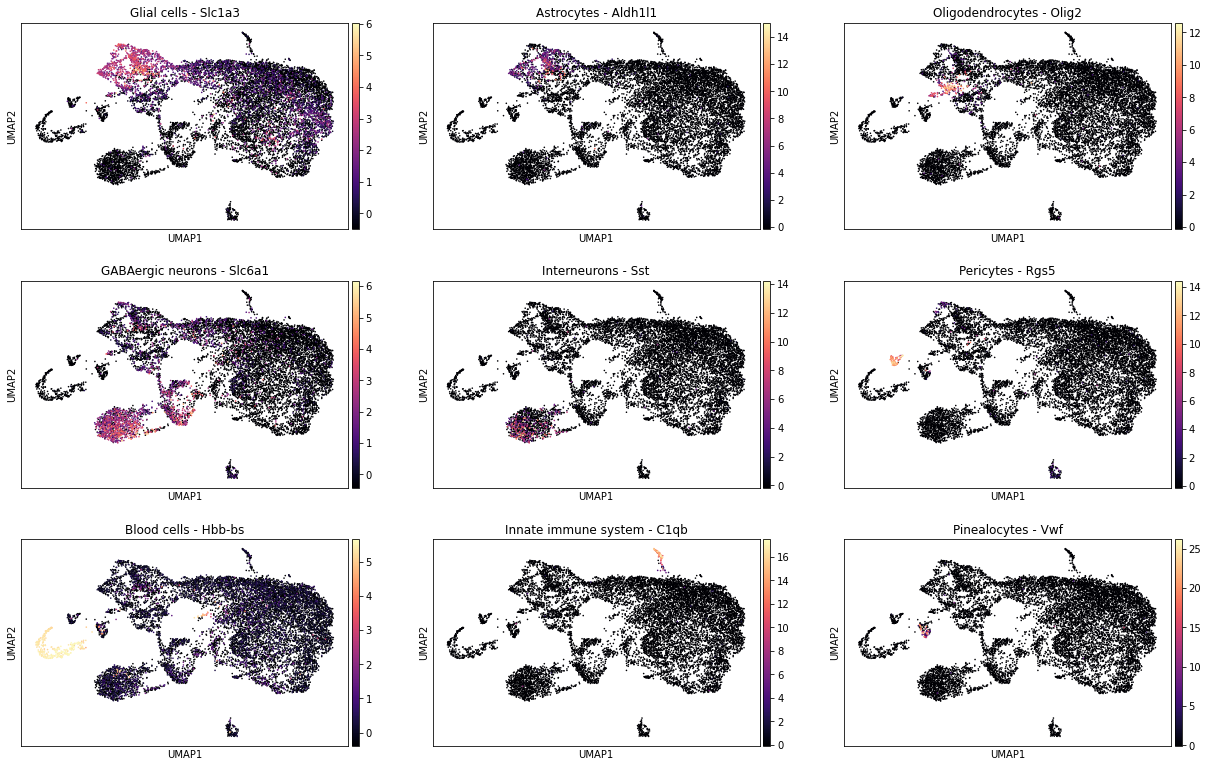

In [10]:
markers = {'Glial cells': 'Slc1a3',
           'Astrocytes': 'Aldh1l1',
           'Oligodendrocytes': 'Olig2',
           'GABAergic neurons': 'Slc6a1',
           'Interneurons': 'Sst',
           'Pericytes': 'Rgs5',
           'Blood cells': 'Hbb-bs',
           'Innate immune system': 'C1qb',
           'Pinealocytes': 'Vwf'}

fig = sc.pl.umap(adata_filt, 
                 color=list(markers.values()),
                 return_fig=True,
                 ncols=3,
                 color_map='magma')

ax = fig.get_axes()
i = -2
for key in markers.keys():
    i += 2
    new_title = key + ' - ' + markers[key]
    ax[i].set_title(new_title)
    
plt.show()

I used the UMAP plot of Leiden groups from Step 2 to help find which number group corresponds to the expression patterns I identified above.

## Plot my classifications on the umap plot

... storing 'classification' as categorical


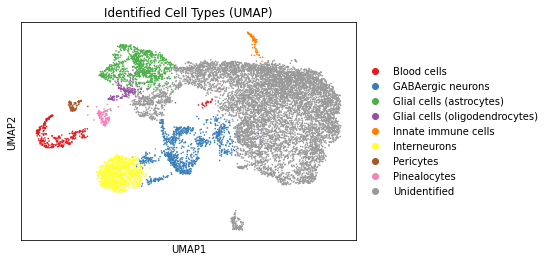

In [11]:
classes = {14: 'Glial cells (astrocytes)',
           5:  'Glial cells (astrocytes)',
           21: 'Glial cells (oligodendrocytes)',
           19: 'GABAergic neurons',
           12: 'GABAergic neurons',
           27: 'GABAergic neurons',
           15: 'GABAergic neurons',
           2:  'Interneurons',
           25: 'Pericytes',
           16: 'Blood cells',
           26: 'Innate immune cells',
           23: 'Pinealocytes'}

class_list = []
for group in adata_filt.obs['leiden']:
    group = int(group)
    if group in classes:
        class_list.append(classes[group])
    else:
        class_list.append('Unidentified')

adata_filt.obs['classification'] = class_list

sc.pl.umap(adata_filt, color='classification',
           palette='Set1',
           title='Identified Cell Types (UMAP)')

## Plot my classifications on the t_SNE plot

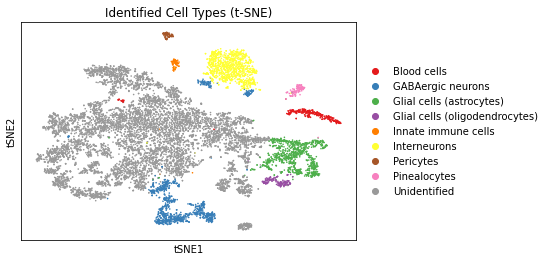

In [12]:
sc.pl.tsne(adata_filt, color='classification',
           palette='Set1',
           title='Identified Cell Types (t-SNE)')